# Определение перспективного тарифа для телеком-компании

Компания «Мегалайн» — федеральный оператор сотовой связи. Клиентам предлагают два тарифных плана: «Смарт» и «Ультра». Чтобы скорректировать рекламный бюджет, коммерческий департамент хочет понять, какой тариф приносит больше денег.

**Цель иследования** 

Сделать предварительный анализ тарифов на небольшой выборке клиентов. В вашем распоряжении данные 500 пользователей «Мегалайна»: кто они, откуда, каким тарифом пользуются, сколько звонков и сообщений каждый отправил за 2018 год. Нужно проанализировать поведение клиентов и сделать вывод — какой тариф лучше.

**Описание тарифов**
* Тариф «Смарт»
1. Ежемесячная плата: 550 рублей
2. Включено 500 минут разговора, 50 сообщений и 15 Гб интернет-трафика
3. Стоимость услуг сверх тарифного пакета: 1. минута разговора: 3 рубля («Мегалайн» всегда округляет вверх значения минут и мегабайтов. Если пользователь проговорил всего 1 секунду, в тарифе засчитывается целая минута); 2. сообщение: 3 рубля; 3. 1 Гб интернет-трафика: 200 рублей.

* Тариф «Ультра»
1. Ежемесячная плата: 1950 рублей
2. Включено 3000 минут разговора, 1000 сообщений и 30 Гб интернет-трафика
3. Стоимость услуг сверх тарифного пакета: 1. минута разговора: 1 рубль; 2. сообщение: 1 рубль; 3. 1 Гб интернет-трафика: 150 рублей.

**План иследования:**

1. Открыть файлы.
2. Подготовить данные.
3. Проанализировать данные.
4. Проверить гипотизы.
5. Общий вывод.

## Открыть файлы.

In [2]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import pylab as pl
import matplotlib.pyplot as plt
import math
import numpy as np
from scipy import stats as st
import copy
import datetime

calls_df = pd.read_csv('/datasets/calls.csv')
internet_df = pd.read_csv('/datasets/internet.csv')
messages_df = pd.read_csv('/datasets/messages.csv')
tariffs_df = pd.read_csv('/datasets/tariffs.csv')
users_df = pd.read_csv('/datasets/users.csv')

In [3]:
display(calls_df.info())
calls_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
id           202607 non-null object
call_date    202607 non-null object
duration     202607 non-null float64
user_id      202607 non-null int64
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ MB


None

,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.00,1000
1,1000_1,2018-08-17,0.00,1000
2,1000_2,2018-06-11,2.85,1000
3,1000_3,2018-09-21,13.80,1000
4,1000_4,2018-12-15,5.18,1000


In [4]:
display(internet_df.info())
internet_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 5 columns):
Unnamed: 0      149396 non-null int64
id              149396 non-null object
mb_used         149396 non-null float64
session_date    149396 non-null object
user_id         149396 non-null int64
dtypes: float64(1), int64(2), object(2)
memory usage: 5.7+ MB


None

,Unnamed: 0,id,mb_used,session_date,user_id
0,0,1000_0,112.95,2018-11-25,1000
1,1,1000_1,1052.81,2018-09-07,1000
2,2,1000_2,1197.26,2018-06-25,1000
3,3,1000_3,550.27,2018-08-22,1000
4,4,1000_4,302.56,2018-09-24,1000


In [5]:
display(messages_df.info())
messages_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
id              123036 non-null object
message_date    123036 non-null object
user_id         123036 non-null int64
dtypes: int64(1), object(2)
memory usage: 2.8+ MB


None

,id,message_date,user_id
0,1000_0,2018-06-27,1000
1,1000_1,2018-10-08,1000
2,1000_2,2018-08-04,1000
3,1000_3,2018-06-16,1000
4,1000_4,2018-12-05,1000


In [6]:
display(tariffs_df.info())
tariffs_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
messages_included        2 non-null int64
mb_per_month_included    2 non-null int64
minutes_included         2 non-null int64
rub_monthly_fee          2 non-null int64
rub_per_gb               2 non-null int64
rub_per_message          2 non-null int64
rub_per_minute           2 non-null int64
tariff_name              2 non-null object
dtypes: int64(7), object(1)
memory usage: 256.0+ bytes


None

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


In [7]:
display(users_df.info())
users_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
user_id       500 non-null int64
age           500 non-null int64
churn_date    38 non-null object
city          500 non-null object
first_name    500 non-null object
last_name     500 non-null object
reg_date      500 non-null object
tariff        500 non-null object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


None

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,NaN,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,NaN,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,1003,23,NaN,Москва,Белла,Белякова,2018-08-17,ultra
4,1004,68,NaN,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra


**Вывод**

1. Во всех колонках с датами был обноружен неверный формат даты.
2. Нужно округлить время звонков и мегабайты интернет-трафика в большую сторону.
3. Проверить на наличие дубликатов.

## Подготовка данных

### Приведём данные к нужным типам

In [8]:
# подсчёт явных дубликатов calls_df
calls_df.duplicated().sum()

0

In [9]:
# подсчёт явных дубликатов internet_df
internet_df.duplicated().sum()

0

In [10]:
# подсчёт явных дубликатов messages_df
messages_df.duplicated().sum()

0

In [11]:
# подсчёт явных дубликатов tariff_df
tariffs_df.duplicated().sum()

0

In [12]:
# подсчёт явных дубликатов users_df
users_df.duplicated().sum()

0

In [13]:
#приведём в формат datetime
calls_df['call_date'] = pd.to_datetime(calls_df['call_date'], format='%Y-%m-%d')
messages_df['message_date'] = pd.to_datetime(messages_df['message_date'], format='%Y-%m-%d')
internet_df['session_date'] = pd.to_datetime(internet_df['session_date'], format='%Y-%m-%d')
users_df['reg_date'] = pd.to_datetime(users_df['reg_date'], format='%Y-%m-%d')
users_df['churn_date'] = pd.to_datetime(users_df['churn_date'], format='%Y-%m-%d')

In [14]:
#добавим столбец month
calls_df['month'] = pd.to_datetime(calls_df['call_date']).dt.month
messages_df['month'] = pd.to_datetime(messages_df['message_date']).dt.month
internet_df['month'] = pd.to_datetime(internet_df['session_date']).dt.month

In [15]:
#изменим тип данных в `user_id` на int
messages_df['user_id'] = messages_df['user_id'].astype('int')

In [16]:
#округлим звонки и интернет-трафик в большую сторону
calls_df['duration'] = calls_df['duration'].apply(np.ceil).replace(0, 1)
internet_df['mb_used'] = internet_df['mb_used'].apply(np.ceil).replace(0, 1)

In [17]:
#в столбце users_df заменим NaN на текущее время
users_df['churn_date'] = users_df['churn_date'].fillna(value = datetime.datetime.now())

In [18]:
#переименуем столбец tariff_name
users_df.set_axis(['user_id', 'age', 'churn_date', 'city', 'first_name', 'last_name', 
                   'reg_date', 'tariff_name'], axis = 'columns', inplace = True)

In [19]:
#обьеденим столбцы `tariffs_df` и `users_df`
table_user_tar = tariffs_df
for df in [users_df]:
    table_user_tar = table_user_tar.merge(df, on = ['tariff_name'], how = 'left')

In [20]:
#запишем две переменные под каждый тариф
table_user_tar_smart = table_user_tar.query('tariff_name == "smart"')
table_user_tar_ultra = table_user_tar.query('tariff_name == "ultra"')
print('Количество пользователей тарифа Smart:', len(table_user_tar_smart))
print('Количество пользователей тарифа Ultra:', len(table_user_tar_ultra))

Количество пользователей тарифа Smart: 351
Количество пользователей тарифа Ultra: 149


In [21]:
#обьеденим таблицы table_user_tar и calls_df
user_call = table_user_tar .merge(calls_df, on = ['user_id'], how = 'left')
pd.set_option('display.max_columns', None)
user_call.sample(5)

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name,user_id,age,churn_date,city,first_name,last_name,reg_date,id,call_date,duration,month
81504,50,15360,500,550,200,3,3,smart,1301,26,2021-12-12 05:20:17.782976,Махачкала,Наида,Авраменко,2018-09-27,1301_142,2018-11-10,12.0,11.0
36921,50,15360,500,550,200,3,3,smart,1135,64,2021-12-12 05:20:17.782976,Архангельск,Милена,Воронина,2018-01-29,1135_297,2018-03-26,1.0,3.0
178539,1000,30720,3000,1950,150,1,1,ultra,1363,69,2021-12-12 05:20:17.782976,Нижний Тагил,Оксана,Болдырева,2018-03-04,1363_66,2018-12-27,1.0,12.0
157431,1000,30720,3000,1950,150,1,1,ultra,1208,69,2021-12-12 05:20:17.782976,Пермь,Ева,Сахарова,2018-03-24,1208_549,2018-07-11,20.0,7.0
28187,50,15360,500,550,200,3,3,smart,1109,64,2021-12-12 05:20:17.782976,Санкт-Петербург,Екатерина,Андрющенко,2018-02-23,1109_291,2018-10-28,18.0,10.0


### Сохраним сводную таблицу пользователей с количеством звонков и суммой минут за месяц

In [22]:
user_call_sum = user_call.pivot_table(index=['user_id', 'month'], values='duration', 
                                      aggfunc=['count', 'sum'])

Проверим результат

In [23]:
user_call_sum.sample(10)

,,count,sum
,,duration,duration
user_id,month,,
1380,6.0,106,841.0
1246,12.0,57,368.0
1228,8.0,62,494.0
1071,6.0,46,324.0
1028,10.0,138,985.0
1391,9.0,111,865.0
1370,5.0,25,213.0
1253,9.0,27,214.0


In [24]:
calls_per_month = calls_df.groupby(['user_id', 'call_date']).agg({'duration': ['count', 'sum']})
calls_per_month.columns = ['calls', 'minutes']
calls_per_month.head()

calls  minutes
user_id call_date                 
1000    2018-05-25      1      1.0
        2018-05-26      6     50.0
        2018-05-27      1      4.0
        2018-05-28      4     30.0
        2018-05-29      2     13.0

Объеденим таблицу user_call_sum и user_call

In [25]:
table_user_call = user_call_sum
table_user_call = table_user_call.merge(user_call, on=['user_id', 'month'], how='outer')

Проверим результат

In [26]:
table_user_call.sample(10)

,user_id,month,"(count, duration)","(sum, duration)",messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name,age,churn_date,city,first_name,last_name,reg_date,id,call_date,duration
175643,1433,8.0,78.0,540.0,50,15360,500,550,200,3,3,smart,71,2021-12-12 05:20:17.782976,Подольск,Клариса,Алёшкова,2018-01-05,1433_426,2018-08-19,9.0
8729,1021,12.0,155.0,995.0,1000,30720,3000,1950,150,1,1,ultra,61,2021-12-12 05:20:17.782976,Краснодар,Святослав,Тихонов,2018-04-26,1021_1030,2018-12-31,1.0
88891,1222,12.0,184.0,1299.0,1000,30720,3000,1950,150,1,1,ultra,44,2021-12-12 05:20:17.782976,Уфа,Пётр,Булгаков,2018-08-30,1222_311,2018-12-28,5.0
79711,1198,12.0,66.0,486.0,50,15360,500,550,200,3,3,smart,26,2021-12-12 05:20:17.782976,Ярославль,Эдуард,Швецов,2018-08-15,1198_155,2018-12-27,11.0
27013,1066,11.0,90.0,696.0,50,15360,500,550,200,3,3,smart,47,2021-12-12 05:20:17.782976,Астрахань,Исак,Малахов,2018-06-24,1066_445,2018-11-25,10.0
40884,1100,11.0,75.0,544.0,50,15360,500,550,200,3,3,smart,58,2021-12-12 05:20:17.782976,Санкт-Петербург,Руслан,Красильников,2018-07-02,1100_454,2018-11-05,2.0
149721,1377,6.0,176.0,1325.0,1000,30720,3000,1950,150,1,1,ultra,59,2021-12-12 05:20:17.782976,Брянск,Альфред,Семин,2018-02-25,1377_357,2018-06-22,11.0
200120,1492,11.0,81.0,527.0,50,15360,500,550,200,3,3,smart,63,2021-12-12 05:20:17.782976,Санкт-Петербург,Руслана,Артёменко,2018-06-26,1492_498,2018-11-14,10.0
23499,1059,10.0,74.0,583.0,50,15360,500,550,200,3,3,smart,47,2021-12-12 05:20:17.782976,Курск,Глеб,Свиридов,2018-04-14,1059_587,2018-10-25,1.0
178237,1443,10.0,116.0,983.0,50,15360,500,550,200,3,3,smart,21,2021-12-12 05:20:17.782976,Казань,Иван,Афинин,2018-09-17,1443_238,2018-10-22,1.0


Создадим сводную таблицу `pivot_call` с данными о тарифах и статистике звонков

In [27]:
pivot_call = table_user_call.pivot_table(index = ['user_id', 'age', 'city', 'month', 'tariff_name', 
                                                  'rub_monthly_fee', 'minutes_included', 
                                                  'messages_included', 'rub_per_message', 
                                                  'rub_per_gb', 'rub_per_minute', 'mb_per_month_included'],
                                         values = ['duration'], aggfunc=['count', 'sum'])
display(pivot_call)

count  \
                                                                                                                                                             duration   
user_id age city        month tariff_name rub_monthly_fee minutes_included messages_included rub_per_message rub_per_gb rub_per_minute mb_per_month_included            
1000    52  Краснодар   5.0   ultra       1950            3000             1000              1               150        1              30720                       22   
                        6.0   ultra       1950            3000             1000              1               150        1              30720                       43   
                        7.0   ultra       1950            3000             1000              1               150        1              30720                       47   
                        8.0   ultra       1950            3000             1000              1               150        1              30720                       52   
                        9.0   ultra       1950            3000             1000              1               150        1              30720                       58   
...                                                                                                                                                               ...   
1498    68  Владикавказ 10.0  smart       550             500              50                3               200        3              15360                       41   
1499    35  Пермь       9.0   smart       550             500              50                3               200        3              15360                        9   
                        10.0  smart       550             500              50                3               200        3              15360                       68   
                        11.0  smart       550             500              50                3               200        3              15360                       74   
                        12.0  smart       550             500              50                3               200        3              15360                       69   

                                                                                                                                                                  sum  
                                                                                                                                                             duration  
user_id age city        month tariff_name rub_monthly_fee minutes_included messages_included rub_per_message rub_per_gb rub_per_minute mb_per_month_included           
1000    52  Краснодар   5.0   ultra       1950            3000             1000              1               150        1              30720                    164.0  
                        6.0   ultra       1950            3000             1000              1               150        1              30720                    187.0  
                        7.0   ultra       1950            3000             1000              1               150        1              30720                    346.0  
                        8.0   ultra       1950            3000             1000              1               150        1              30720                    418.0  
                        9.0   ultra       1950            3000             1000              1               150        1              30720                    478.0  
...                                                                                                                                                               ...  
1498    68  Владикавказ 10.0  smart       550             500              50                3               200        3              15360                    258.0  
1499    35  Пермь       9.0   smart       550             500              50                3               200 

Создадим таблицу `table_user_tar` из `df_messages`

In [28]:
user_messages = table_user_tar
user_messages = user_messages.merge(messages_df, on=['user_id'], how='outer')
    
#Сохраним сводную таблицу user_messages_sum с данными о тарифах и статистике сообщений
user_messages_sum = user_messages.pivot_table(index=['user_id', 'month'], values='id',
                                             aggfunc='count')
#вывудим таблицу
user_messages_sum.sample(10)

,,id
user_id,month,
1045,5.0,55
1046,8.0,13
1083,6.0,54
1227,5.0,38
1099,7.0,31
1251,8.0,75
1180,11.0,15
1056,7.0,39
1458,4.0,4


Создадим таблицу pivot_call и user_messages_sum, сохраним в одной таблице merge.

In [29]:
merge = pivot_call.join(user_messages_sum)
merge

(count, duration)  \
user_id month minutes_included age mb_per_month_included tariff_name city        rub_per_message messages_included rub_per_minute rub_per_gb rub_monthly_fee                      
1000    5.0   3000             52  30720                 ultra       Краснодар   1               1000              1              150        1950                            22   
        6.0   3000             52  30720                 ultra       Краснодар   1               1000              1              150        1950                            43   
        7.0   3000             52  30720                 ultra       Краснодар   1               1000              1              150        1950                            47   
        8.0   3000             52  30720                 ultra       Краснодар   1               1000              1              150        1950                            52   
        9.0   3000             52  30720                 ultra       Краснодар   1               1000              1              150        1950                            58   
...                                                                                                                                                                         ...   
1498    10.0  500              68  15360                 smart       Владикавказ 3               50                3              200        550                             41   
1499    9.0   500              35  15360                 smart       Пермь       3               50                3              200        550                              9   
        10.0  500              35  15360                 smart       Пермь       3               50                3              200        550                             68   
        11.0  500              35  15360                 smart       Пермь       3               50                3              200        550                             74   
        12.0  500              35  15360                 smart       Пермь       3               50                3              200        550                             69   

                                                                                                                                                              (sum, duration)  \
user_id month minutes_included age mb_per_month_included tariff_name city        rub_per_message messages_included rub_per_minute rub_per_gb rub_monthly_fee                    
1000    5.0   3000             52  30720                 ultra       Краснодар   1               1000              1              150        1950                       164.0   
        6.0   3000             52  30720                 ultra       Краснодар   1               1000              1              150        1950                       187.0   
        7.0   3000             52  30720                 ultra       Краснодар   1               1000              1              150        1950                       346.0   
        8.0   3000             52  30720                 ultra       Краснодар   1               1000              1              150        1950                       418.0   
        9.0   3000             52  30720                 ultra       Краснодар   1               1000              1              150        1950                       478.0   
...                                                                                                                                                                       ...   
1498    10.0  500              68  15360                 smart       Владикавказ 3               50                3              200        550                        258.0   
1499    9.0   500              35  15360                 smart       Пермь       3               50                3              200        550                         71.0   
        10.0  500              35  15360                 sma

Объеденим таблицу table_user_tar из df_internet.

In [30]:
mb_used = table_user_tar
mb_used = mb_used.merge(internet_df, on='user_id', how='outer')
    
#Сохраним сводную таблицу mb_used с данными о тарифах и статистике затрат интернета
mb_used_sum = mb_used.pivot_table(index=['user_id', 'month'], values='mb_used', 
                                  aggfunc=['sum'])

#выведим тбалицу
mb_used_sum.sample(10)

,,sum
,,mb_used
user_id,month,
1025,10.0,14462.0
1027,8.0,24909.0
1344,8.0,21124.0
1408,10.0,21524.0
1302,10.0,14643.0
1290,6.0,23136.0
1057,5.0,20414.0
1140,12.0,20075.0


Соединим таблицы merge и mb_used_sum, сохраним в одной таблице full_table

In [31]:
full_table = merge.join(mb_used_sum)

#Переименуем столбцы со статистикой
full_table.columns = ['duration_count', 'duration_count_sum', 'messages', 'mb_used']
#виведем полученую таблицу
full_table.sample(10)

,,,,,,,,,,,,duration_count,duration_count_sum,messages,mb_used
user_id,month,minutes_included,age,mb_per_month_included,tariff_name,city,rub_per_message,messages_included,rub_per_minute,rub_per_gb,rub_monthly_fee,,,,
1300,10.0,3000,40,30720,ultra,Москва,1,1000,1,150,1950,111,759.0,191.0,38328.0
1372,7.0,500,71,15360,smart,Магнитогорск,3,50,3,200,550,58,393.0,41.0,13683.0
1356,11.0,3000,75,30720,ultra,Москва,1,1000,1,150,1950,145,1053.0,162.0,23773.0
1373,5.0,500,34,15360,smart,Улан-Удэ,3,50,3,200,550,2,13.0,48.0,29775.0
1402,5.0,3000,23,30720,ultra,Пенза,1,1000,1,150,1950,92,701.0,32.0,27456.0
1086,12.0,500,73,15360,smart,Волгоград,3,50,3,200,550,68,523.0,29.0,20049.0
1093,10.0,500,73,15360,smart,Санкт-Петербург,3,50,3,200,550,106,809.0,79.0,20732.0
1089,4.0,3000,19,30720,ultra,Иркутск,1,1000,1,150,1950,59,395.0,130.0,16662.0
1468,5.0,500,29,15360,smart,Тамбов,3,50,3,200,550,24,145.0,11.0,15200.0


### Подгатовка данных в таблице `full_table`

In [32]:
#Посмотрим на пропущенные значения
full_table.isnull().sum()

duration_count          0
duration_count_sum      0
messages              496
mb_used                11
dtype: int64

В результате видим, что есть пропущенные значения в `messages` и `mb_used`. Возможно некоторые пользователи не пользовались интернетом и не отправляли сообщения некоторое время. Нужно заменить эти пропуски на ноль.

In [33]:
full_table['messages'] = full_table['messages'].fillna(0)
full_table['mb_used'] = full_table['mb_used'].fillna(0)

full_table.reset_index(inplace=True)

#Напишем формулу и добавим столбцы с прибылью сверх тарифа по звонкам, сообщениям и интернету.
full_table['calls_revenue'] = ((full_table['duration_count_sum'] - full_table['minutes_included']) * full_table['rub_per_minute'])
full_table['messages_revenue'] = ((full_table['messages'] - full_table['messages_included']) * full_table['rub_per_message'])
full_table['mg_revenue'] = ((full_table['mb_used'] - full_table['mb_per_month_included']) * full_table['rub_per_gb']/1024)

#Проверим результат
full_table.sample(5)

,user_id,month,minutes_included,age,mb_per_month_included,tariff_name,city,rub_per_message,messages_included,rub_per_minute,rub_per_gb,rub_monthly_fee,duration_count,duration_count_sum,messages,mb_used,calls_revenue,messages_revenue,mg_revenue
860,1138,12.0,500,23,15360,smart,Екатеринбург,3,50,3,200,550,100,552.0,8.0,25653.0,156.0,-126.0,2010.351562
1693,1272,9.0,3000,61,30720,ultra,Пенза,1,1000,1,150,1950,39,306.0,73.0,25543.0,-2694.0,-927.0,-758.349609
320,1051,10.0,500,37,15360,smart,Москва,3,50,3,200,550,16,124.0,0.0,10183.0,-1128.0,-150.0,-1011.132812
1130,1179,4.0,500,43,15360,smart,Вологда,3,50,3,200,550,28,228.0,0.0,6060.0,-816.0,-150.0,-1816.406250
1132,1179,6.0,500,43,15360,smart,Вологда,3,50,3,200,550,70,451.0,0.0,15842.0,-147.0,-150.0,94.140625


Видим отрицательные значения. В этой ситуации, когда получается отрицательная разница между лимитлм звонков и реальной длительностью случается тогда, когда абонент не израсходовал весь лимит. В этом случае перерасхода не случается и отрицательный перерасход нужно обнулить.

In [34]:
full_table['messages_revenue'] = full_table['messages_revenue'].clip(lower=0)
full_table['calls_revenue'] = full_table['calls_revenue'].clip(lower=0)
full_table['mg_revenue'] = full_table['mg_revenue'].clip(lower=0)

#Переведём нужные столбцы в тип int.
full_table['calls_revenue'] = full_table['calls_revenue'].astype('int')
full_table['messages_revenue'] = full_table['messages_revenue'].astype('int')
full_table['messages'] = full_table['messages'].astype('int')
full_table['mg_revenue'] = full_table['mg_revenue'].astype('int')
full_table['month'] = full_table['month'].astype('int')

#Проверим результат
full_table.sample(5)

,user_id,month,minutes_included,age,mb_per_month_included,tariff_name,city,rub_per_message,messages_included,rub_per_minute,rub_per_gb,rub_monthly_fee,duration_count,duration_count_sum,messages,mb_used,calls_revenue,messages_revenue,mg_revenue
157,1023,12,500,42,15360,smart,Томск,3,50,3,200,550,84,574.0,49,28442.0,222,0,2555
2634,1415,8,3000,41,30720,ultra,Москва,1,1000,1,150,1950,82,604.0,37,32746.0,0,0,296
433,1067,9,500,45,15360,smart,Москва,3,50,3,200,550,70,561.0,47,12783.0,183,0,0
3075,1481,10,500,70,15360,smart,Москва,3,50,3,200,550,35,283.0,25,18265.0,0,0,567
2249,1360,8,3000,46,30720,ultra,Санкт-Петербург,1,1000,1,150,1950,98,789.0,0,8643.0,0,0,0


Добавим новый столбец revenue, где подсуммируем прибыль с учетом стоимости тарифа и сверх тарифа.

In [35]:
full_table['revenue'] = full_table['rub_monthly_fee'] + full_table['calls_revenue'] + full_table['messages_revenue'] + full_table['mg_revenue']
#Проверим результат
full_table.sample(5)

,user_id,month,minutes_included,age,mb_per_month_included,tariff_name,city,rub_per_message,messages_included,rub_per_minute,rub_per_gb,rub_monthly_fee,duration_count,duration_count_sum,messages,mb_used,calls_revenue,messages_revenue,mg_revenue,revenue
954,1153,11,500,59,15360,smart,Ульяновск,3,50,3,200,550,86,642.0,0,16056.0,426,0,135,1111
639,1101,12,500,27,15360,smart,Казань,3,50,3,200,550,87,734.0,0,8351.0,702,0,0,1252
1390,1220,12,500,59,15360,smart,Ростов-на-Дону,3,50,3,200,550,102,787.0,0,21003.0,861,0,1102,2513
1564,1250,10,500,20,15360,smart,Смоленск,3,50,3,200,550,70,559.0,52,16159.0,177,6,156,889
1295,1204,8,500,18,15360,smart,Москва,3,50,3,200,550,64,499.0,0,20872.0,0,0,1076,1626


Сохраним в переменной total_revenue общую прибыль с каждого тарифа отдельно по звонкам/сообщениям/интернету и общую стоимость.

In [36]:
total_revenue = full_table.pivot_table(index=['tariff_name'], 
                                       values=['calls_revenue', 'messages_revenue', 
                                               'mg_revenue', 'revenue'], aggfunc='sum')

#Выведим таблицу total_revenue
total_revenue

,calls_revenue,messages_revenue,mg_revenue,revenue
tariff_name,,,,
smart,316056,38784,1205941,2783431
ultra,0,0,106002,1960452


**Вывод:**

* Больше дополнительного дохода приносит тариф Smart
* В тарифах Samrt и Ultra самым прибыльным сегментом является интернет
* У тарифа Smart общая прибыль больше

Сохраним в переменную sum_smart таблицу пользователей с тарифом Smart.

In [37]:
sum_smart = full_table[(full_table['tariff_name'] == 'smart')]

Сохраним в переменную sum_ultra таблицу пользователей с тарифом Ultra.



In [38]:
sum_ultra = full_table[(full_table['tariff_name'] == 'ultra')]

## Анализ данных

### Выведим гистограммы со статистикой пользователей Smart.

В тариф Smart включено 500 минут разговора, 50 сообщений и 15 Гб интернет-трафика.

Построим гистограмму с кол-ством минут для тарифа.

Text(0, 0.5, 'Количество пользователей')

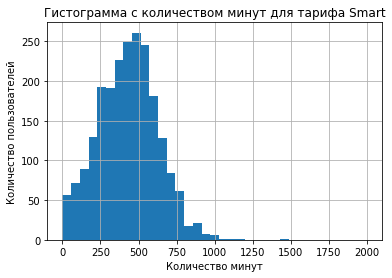

In [39]:
sum_smart['duration_count_sum'].hist(bins=35, range=(0, 2000))
pl.title("Гистограмма с количеством минут для тарифа Smart")
pl.xlabel("Количество минут")
pl.ylabel("Количество пользователей")

**Вывод:**

* Видим, что пик затрат минут как раз приходится на лимит тарифа: 250 - 500 минут, но довольно много пользователей тратят больше лимита, доходя до 600 - 750 минут, встречаются и около 1000. 

Построим гистограмму с кол-ством сообщений для тарифа.

Text(0, 0.5, 'Количество пользователей')

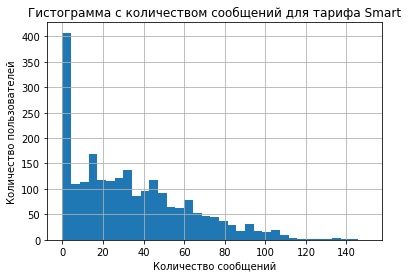

In [40]:
sum_smart['messages'].hist(bins=35, range=(0, 150))
pl.title("Гистограмма с количеством сообщений для тарифа Smart")
pl.xlabel("Количество сообщений")
pl.ylabel("Количество пользователей")

**Вывод:**

* Видим, что очень много пользователей не отправляют сообщения, либо отправляют не более 5-ти. Скорее всего такие пользователи пользуются мессенджерами.
* Не мало пользователей превышают лимит в 50 сообщений и довольно много встречаются отправки 50-80 сообщений, есть выше 100 сообщений.

Построим гистограмму с количеством мегабайт для тарифа.

Text(0, 0.5, 'Количество пользователей')

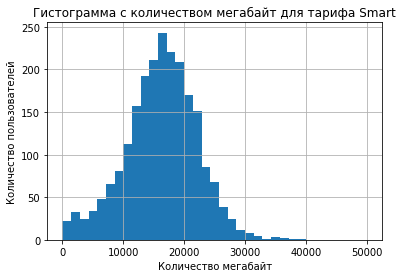

In [41]:
sum_smart['mb_used'].hist(bins=35, range=(0, 50000))
pl.title("Гистограмма с количеством мегабайт для тарифа Smart")
pl.xlabel("Количество мегабайт")
pl.ylabel("Количество пользователей")

**Вывод:**

* Видим, что небольшая часть пользователей не пользуются интернетом, либо же используют не больше 5 гб.
* Пик припадает на уровне 15 гб, но много пользователей превышают данный лимит и хвост доходит к 0 только ближе к 30 гб.

### Выведим гистограммы со статистикой пользователей Ultra.

В тариф Ultra включено 3000 минут разговора, 1000 сообщений и 30 Гб интернет-трафика.

Построим гистограмму с кол-ством минут для тарифа.

Text(0, 0.5, 'Количество пользователей')

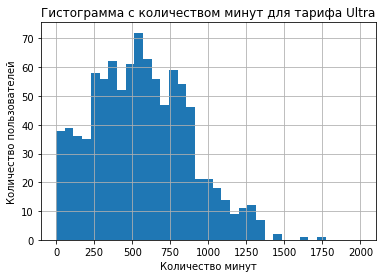

In [42]:
sum_ultra['duration_count_sum'].hist(bins=35, range=(0, 2000))
pl.title("Гистограмма с количеством минут для тарифа Ultra")
pl.xlabel("Количество минут")
pl.ylabel("Количество пользователей")

**Вывод:**

* Видим, что небольшая часть пользователей используют не больше 250 минут.
* Пик количества минут находится около 500-600 минут и держится до 800 минут, далее резкий спад, хвост приближается к 0 после 1300 минут.

Построим гистограмму с количеством сообщения для тарифа.


Text(0, 0.5, 'Количество пользователей')

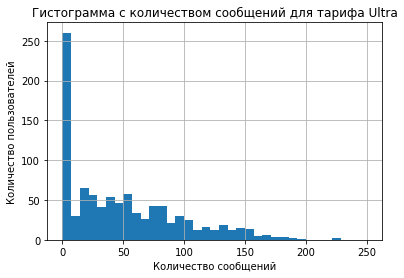

In [43]:
sum_ultra['messages'].hist(bins=35, range=(0, 250))
pl.title("Гистограмма с количеством сообщений для тарифа Ultra")
pl.xlabel("Количество сообщений")
pl.ylabel("Количество пользователей")

**Вывод:**

* Видим, что очень много пользователей не отпрааляю сообщения, либо же отправляют не больше 5.
* Те, кто пользуется отправкой сообщений отправляет около 20-100 сообщений, хвост приближается к 0 после 150 сообщений.

Построим гистограмму с количеством мегабайт для тарифа.

Text(0, 0.5, 'Количество пользователей')

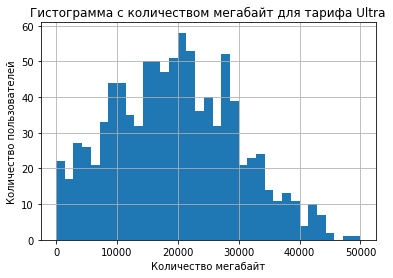

In [44]:
sum_ultra['mb_used'].hist(bins=35, range=(0, 50000))
pl.title("Гистограмма с количеством мегабайт для тарифа Ultra")
pl.xlabel("Количество мегабайт")
pl.ylabel("Количество пользователей")

**Вывод:**

* Видим, что небольшая часть пользователей не использует интернет.
* Пик мегабайт приходит на 20-23 гб, так же виден скачёк ближе к 30 гб, хвост приближается к 0 после 45 гб.

Посчитаем среднее количество, дисперсию и стандартное отклонение по каждому тарифу.

In [45]:
variance = full_table.pivot_table(index=['tariff_name'], values=['duration_count_sum', 
                                                                 'messages', 'mb_used'],
                                 aggfunc=['mean', 'var', 'std'])
#Проверим результат
variance

mean                                         var  \
            duration_count_sum       mb_used   messages duration_count_sum   
tariff_name                                                                  
smart               430.609987  16238.160144  33.396311       37577.967083   
ultra               560.113565  19482.347003  49.033649       99062.633405   

                                                      std                \
                  mb_used     messages duration_count_sum       mb_used   
tariff_name                                                               
smart        3.464007e+07   798.595792         193.850373   5885.581942   
ultra        1.027540e+08  2198.733603         314.742170  10136.764424   

                        
              messages  
tariff_name             
smart        28.259437  
ultra        46.890656

**Общий:**

* Пользователи тарифа Smart часто привышают лимиты, чаще всего по количеству минут и очень много по лимиту интернета.
* Пользователи тарифа Ultra практически не превышают лимитов, кроме интернета.
* Пользователи двух тарифов используют примерно одинаковые объемы интернета, особенно на пиках графиков.
* В двух тарифак довольно много либо не пользуются отправкой сообщений, либо же используют в небольших количествах около 5-10 сообщений.
* Пользователи тарифа Ultra чаще всего не используют весь лимит по звонкам и сообщениям.

## Проверка гипотез

### Проверка гипотезы, что средняя выручка пользователей тарифов «Ультра» и «Смарт» различается

Начнём с формулировки нулевой гипотезы. H₀ всегда формулируется так, чтобы использовать знак равенства. H₀ - среднее рассматриваемой генеральной совокупности равно второй. Исходя из H₀ формулируется альтернативная гипотеза H₁. Для этой H₀ - среднее генеральной совокупности не равно второй.

**Нулевой гипотезой будет гипотеза о том, что средние наших выборок равны. Альтернативной гипотезой будет наша гипотеза "Средняя выручка пользователей тарифов «Ультра» и «Смарт» различается".**

Критический уровень статистической значимости присвоим значением 0.05.

Чтобы проверить гипотезу о равенстве среднего двух генеральных совокупностей по взятым из них выборкам, примените метод scipy.stats.ttest_ind.


In [46]:
smart = sum_smart['revenue']
ultra = sum_ultra['revenue']

print('Среднее Smart:', pd.Series(smart).mean())
print('Среднее Ultra:', pd.Series(ultra).mean())
alpha = 0.05

result = st.ttest_ind(smart, ultra)

print('p-значение:', result.pvalue)

if (result.pvalue < alpha):
    print('Отвергаем нулевую гипотизу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

Среднее Smart: 1252.10571300045
Среднее Ultra: 2061.4637223974764
p-значение: 3.3828237671576783e-174
Отвергаем нулевую гипотизу


**Вывод:**

Можем сказать, что выручка по двум тарифам сильно различается. Вернее, только исходя из проверки гипотезы мы не можем сказать, что больше, — только то что количество выручки отличается. Потому что гипотеза двухсторонняя: мы не знаем, в какую сторону оно отличается. Однако посчитав среднее количество выручки для обоих тарифов, с уверенностью можем сказать: cредняя выручка из тарифа Ultra выше.

### Проверка гипотезы, что средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов

In [47]:
#Сохраним moscow_tariff список пользователей из Москвы
moscow_tariff = full_table[(full_table['city'] == 'Москва')]

#Сохраним other_tariff список пользователей из других регионов
other_tariff = full_table[(full_table['city'] != 'Москва')]

Проверим, отличается ли среднняя выручка по пользователям Москвы и других регионов.

In [48]:
moscow = moscow_tariff['revenue']
other = other_tariff['revenue']

print('Выручка по Москве:', pd.Series(moscow).mean())
print('Выручка в других регионах', pd.Series(other).mean())
alpha = 0.05

result = st.ttest_ind(moscow, other)

print('p-значение:', result.pvalue)

if (result.pvalue < alpha):
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

Выручка по Москве: 1516.8262295081968
Выручка в других регионах 1489.3209828393135
p-значение: 0.4390714153457218
Не получилось отвергнуть нулевую гипотезу


**Вывод:**

Можем сказать, что выручка по Москве и других регионам почти не различается. Вернее, только исходя из проверки гипотезы мы не можем сказать, что больше, — только что количество выручки почти одинаково и входит в диапазон статистической значимости. Посчитав среднее количество выручки для Москвы и других регионов, с уверенностью можем сказать: выручка не отличается существенно.

#### Проверим, отличается ли среднняя выручка по тарифу Смарт пользователей Москвы и других регионов.

In [49]:
#Сохраним moscow_tariff_smart список пользователей из Москвы с тарифом Смарт
moscow_tariff_smart = full_table[(full_table['city'] == 'Москва') & 
                                 (full_table['tariff_name'] == 'smart')]

#Сохраним other_tariff_smart список пользователей из других регионов с тарифом Смарт
other_tariff_smart = full_table[(full_table['city'] != 'Москва') &
                               (full_table['tariff_name'] == 'smart')]

In [50]:
moscow = moscow_tariff_smart['revenue']
other = other_tariff_smart['revenue']

print('Выручка по Москве тарифа Smart:', pd.Series(moscow).mean())
print('Выручка в других регионах тарифа Smart', pd.Series(other).mean())
alpha = 0.05

result = st.ttest_ind(moscow, other)

print('p-значение:', result.pvalue)

if (result.pvalue < alpha):
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевуюгипотезу')

Выручка по Москве тарифа Smart: 1199.2227979274612
Выручка в других регионах тарифа Smart 1263.2177463255307
p-значение: 0.15225169223911475
Не получилось отвергнуть нулевуюгипотезу


#### Проверим, отличается ли среднняя выручка по тарифу Ультра пользователей Москвы и других регионов.

In [51]:
#Сохраним moscow_tariff_smart список пользователей из Москвы с тарифом Ultra
moscow_tariff_ultra = full_table[(full_table['city'] == 'Москва') &
                                (full_table['tariff_name'] == 'ultra')]

#Сохраним other_tariff_smart список пользователей из других регионов с тарифом Смарт
other_tariff_ultra = full_table[(full_table['city'] != 'Москва') &
                               (full_table['tariff_name'] == 'ultra')]

In [52]:
moscow = moscow_tariff_ultra['revenue']
other = other_tariff_ultra['revenue']

print('Выручка по Москве тарифа ультра:', pd.Series(moscow).mean())
print('Выручка по другим регионам:', pd.Series(other).mean())
alpha = 0.05

results = st.ttest_ind(moscow, other)
print('p-значение:', result.pvalue)

if (result.pvalue < alpha):
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гепотизу')

Выручка по Москве тарифа ультра: 2064.125
Выручка по другим регионам: 2060.643741403026
p-значение: 0.15225169223911475
Не получилось отвергнуть нулевую гепотизу


**Вывод:**

Видим, что выручка по Москве и других регионам, по тарифам почти не различается. Вернее, только исходя из проверки гипотезы мы не можем сказать, что больше, — только что количество выручки почти одинаково и входит в диапазон статистической значимости. 

## Общие выводы с анализа перспективного тарифа для телеком компании

* Пользователи больше предпочитают тариф Smart.
* Больше всего приносит дополнительного дохода тариф Smart.
* Самым прибильным сегментом является - интернет, при том в двух тарифах.
* Общая прибыль больше всего у тарифа Smart.
* Пользователи тарифа Smart часто не вклиниваются в лимиты, чаще всего по количеству минут и очень много по лимиту итернета.
* Пользователи тарифа Ultra практически не превышают лимитов, кроме интернета.
* Пользователи двух тарифов используют примерно одинаковые объемы интернета, особенно на пиках графиков.
* В двух тарифак довольно много либо не пользуются отправкой сообщений, либо же используют в небольших количествах до 5-10 сообщений.
* Пользователи тарифа Ultra чаще всего не используют весь лимит по звонкам и сообщениям.
* Несмотря на то, что больше прибыли приносит тариф Smart, среднняя выручка выше у Ultra.
* Разница в средней вырчки из Москвы и других регонов - незначительная, это относится и к сравнению тарифов по Москве и регионам.